# Step 1: Define Objective & Load Dataset
**Objective**: Predict which customers are likely to churn using the Telco dataset.
**Dataset Used**: Telco Customer Churn Dataset (Kaggle)

In [ ]:
import pandas as pd
#Load Dataset
df = pd.read_csv("/content/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Step 2: Data Exploration & Initial Analysis
**Tasks**: Load dataset, view structure, check nulls, understand target

In [ ]:
# Basic info
df.info()
# Check missing values
df.isnull().sum()
# Target distribution counts
df['Churn'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count
Churn,
No,5174
Yes,1869


# Step 3: Data Cleaning
**Tasks**: Handle missing values, convert types, drop irrelevant columns.

In [ ]:
print(df.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [ ]:
# Drop customerID (not useful for prediction)
df.drop('customerID', axis=1, inplace=True)
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Fill nulls in TotalCharges
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-645647506.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:
print(df.columns.tolist())

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


# Step 4: Feature Engineering
**Tasks**: Encode categorical features, scale numerical values.

In [ ]:
from sklearn.preprocessing import StandardScaler
# sklearn = Scikit-Learn
# Ek Python library hai jo:
# Machine Learning ke almost sab tools ready-made deta hai
# Models (LogisticRegression, RandomForest, etc.)
# Preprocessing tools (Scaler, OneHotEncoder)
# Model Evaluation (accuracy_score, classification_report, confusion_matrix)
# Train-test split

df['Churn']=df['Churn'].map({'Yes':1,'No':0})  #Converting 'Yes'/'No' to 1/0
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  #category ke liye alag column bana dete hain

scalar = StandardScaler()
df[['tenure','MonthlyCharges','TotalCharges']] = scalar.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])  #Har number ko ek standard format mein laata hai

# Step 5: Data Splitting
**Tasks**: Split data into train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #hum data ko train aur test parts mein baantne ke liye karte hain. Taaki machine ko pehle training mile, fir uska test liya ja sak

# Step 6: Model Training
**Tasks**: Train Logistic Regression, Random Forest, and XGBoost model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

log_model = LogisticRegression(max_iter=1000)  # humein Yes/No, 1/0, Churn/Not Churn predict krna ho
rf_model = RandomForestClassifier()  # create multiple tree then vote for correct answer
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # hr naye tree mai mistake theek krta hai jo pichle tree ne ki thi

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:26:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

# Step 7: Model Evaluation
**Tasks**: Evaluate models with confusion matrix, precision, recall, F1, ROC-AUC.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
models = {'Logistic Regression': log_model, 'Random Forest': rf_model, 'XGBoost': xgb_model}
for name, model in models.items():
 y_pred = model.predict(X_test)
 print(f"\n{name} Classification Report:")
 print(classification_report(y_test, y_pred))

 #0 = Not Churned customer (jo service chhodke nahi gaya)
 #1 = Churned customer (jo service chhod gaya)
 #precision => Out of all the customers the model said “Churn”, kitne sach mein churn the?
 #Recall => Of all the actual churned customers, kitno ko model ne pakda?
 #f1 => Precision or Recall ka balance score.
 #support => itne actual number hai jo churn hue hai or nhi


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.61      0.53      0.57       374

    accuracy                           0.78      1409
   macro avg  

# Step 8: Churn Probability Predictions
**Tasks**: Predict churn probabilities using best model.

In [ ]:
# Use best model, e.g., XGBoost
churn_probs = xgb_model.predict_proba(X_test)[:,1]  #XGBoost model se probabilities nikal raha hai [:, 1]	Probability that the customer WILL churn
# Add probabilities to a DataFrame
results = pd.DataFrame({'Actual': y_test, 'Churn_Probability': churn_probs})
results.head()

,Actual,Churn_Probability
437,0,0.001307
2280,0,0.949850
2235,0,0.088714
4460,0,0.381180
3761,0,0.000342


from matplotlib import pyplot as plt
_df_0['Churn_Probability'].plot(kind='hist', bins=20, title='Churn_Probability')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Actual']
  ys = series['Churn_Probability']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Actual', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Actual')
_ = plt.ylabel('Churn_Probability')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Actual']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Actual'}, axis=1)
              .sort_values('Actual', ascending=True))
  xs = counted['Actual']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Actual', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Actual')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['Churn_Probability'].plot(kind='line', figsize=(8, 4), title='Churn_Probability')
plt.gca().spines[['top', 'right']].set_visible(False)

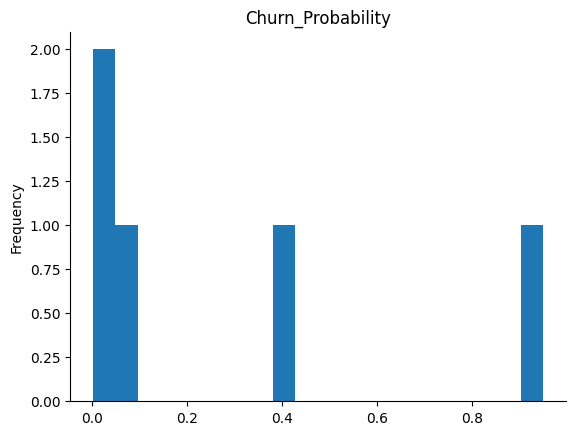

In [14]:
from matplotlib import pyplot as plt
_df_0['Churn_Probability'].plot(kind='hist', bins=20, title='Churn_Probability')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Step 9: Feature Importance Analysis
**Tasks**: Visualize important features using model explainability tools.

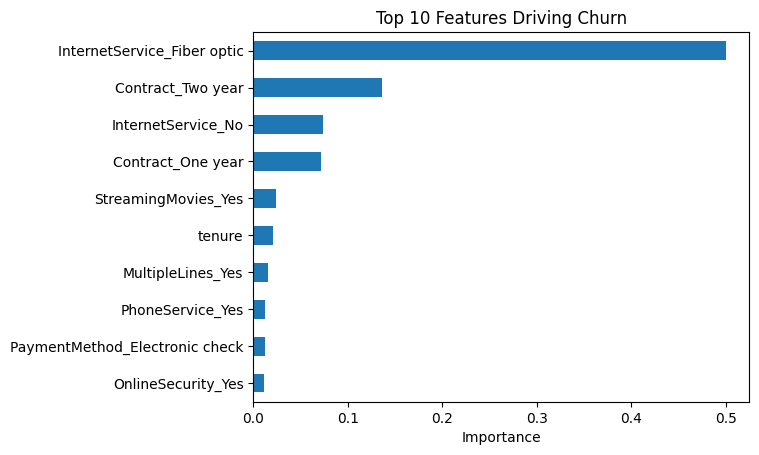

In [15]:
# Plot feature importances
import matplotlib.pyplot as plt
importances = xgb_model.feature_importances_  #XGBoost ne training ke time har feature ko kuch importance score diya hota hai. score mtlb model ne kitna sikha
features = X.columns  # fetures => 'gender', 'tenure', 'PaymentMethod', 'InternetService', etc
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp.head(10).plot(kind='barh')  #Top 10 features dikhane hain barh = horizontal bar chart
plt.xlabel("Importance")
plt.title("Top 10 Features Driving Churn")
plt.gca().invert_yaxis()  # sabse imp uper
plt.show()

# Step 10: Business Insights Report
**Tasks**: Write business-friendly interpretations of model results.

Customers with month-to-month contracts and high total charges are more likely to churn.
Tenure and contract type are strong predictors of churn.


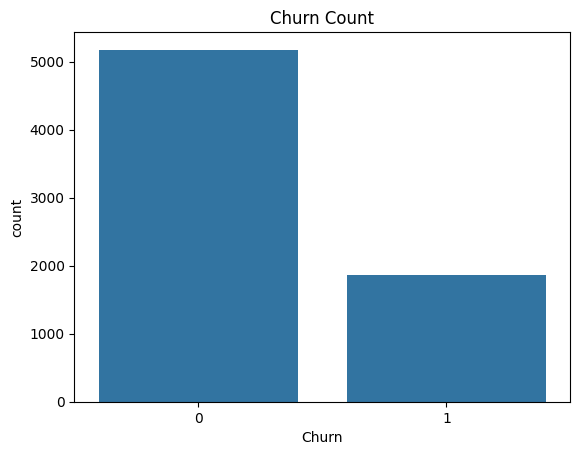

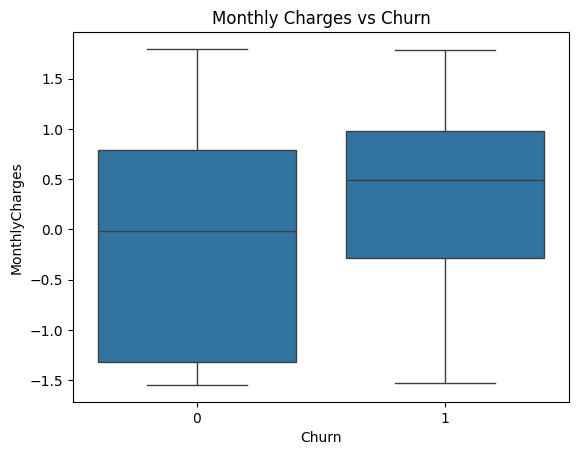

In [16]:
# Churn distribution
print("Customers with month-to-month contracts and high total charges are more likely to churn.")
print("Tenure and contract type are strong predictors of churn.")
import seaborn as sns
sns.countplot(x='Churn', data=df)
plt.title("Churn Count")
plt.show()
# Monthly charges by churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

In [3]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.6 MB/s eta 0:00:00


In [4]:
# Install ngrok
!pip install pyngrok

# Import it
from pyngrok import ngrok

# Connect your account (replace YOUR_AUTH_TOKEN with your real token)
!ngrok config add-authtoken <YOUR_AUTH_TOKEN>

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [5]:
import os
os.system("nohup streamlit run /content/churn_prediction_dashboard.py &")

0

In [6]:
public_url = ngrok.connect("http://localhost:8501")
print("🔗 Your Streamlit Dashboard URL:", public_url)

🔗 Your Streamlit Dashboard URL: NgrokTunnel: "https://7cf1bd2edb12.ngrok-free.app" -> "http://localhost:8501"
